In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('creditcard-training set v2.csv')
print(df.shape)
df.head()

(227844, 32)


,Seconds since reference time,Amount,"Fraud? (1: Fraud, 0: No Fraud)",Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [76]:
df.rename(inplace=True, columns={
    'Seconds since reference time':'Time',
    'Fraud? (1: Fraud, 0:  No Fraud)':'Fraud?'
})
df.head()

,Time,Amount,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


Text(0,0.5,'Frequency')

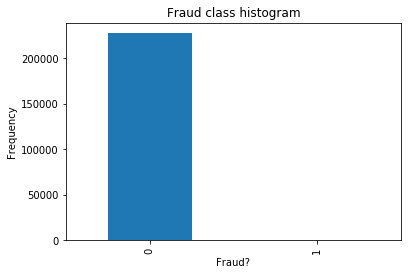

In [77]:
count_classes = pd.value_counts(df['Fraud?'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Fraud?")
plt.ylabel("Frequency")

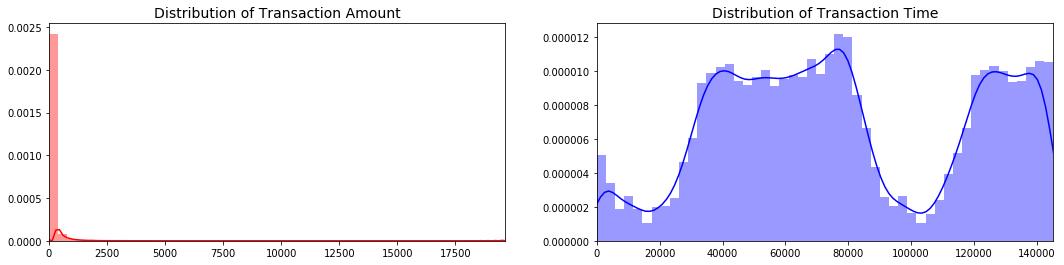

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
https://towardsdatascience.com/getting-started-with-graph-analysis-in-python-with-pandas-and-networkx-5e2d2f82f18e

Undersampling data (50/50)

Assumption 1: Timing does not matter as the fraud can occur at random times

In [79]:
df.head()

,Time,Amount,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,0,149.62,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,0,2.69,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,1,378.66,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1,123.50,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,2,69.99,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [80]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers, scaling amount and time to range (-1,1)
df['normAmount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1, inplace=True)

# Changing position to the front
scaled_amount = df['normAmount']
scaled_time = df['normTime']

df.drop(['normAmount', 'normTime'], axis=1, inplace=True)
df.insert(0, 'normAmount', scaled_amount)
df.insert(1, 'normTime', scaled_time)

# Amount and Time are Scaled!

df.head()

,normAmount,normTime,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
0,1.705906,-1.007689,0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,...,0.462388,0.239599,0.098698,-6.399372,-0.311169,-0.991390,-0.617801,-0.551600,0.090794,0.363787
1,-0.279903,-1.007689,0,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,...,-0.082361,-0.078803,0.085102,13.786441,-0.143772,0.489095,1.065235,1.612727,-0.166974,-0.255425
2,4.801460,-1.007675,0,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,...,1.800499,0.791461,0.247676,-10.515321,-0.165946,0.717293,0.066084,0.624501,0.207643,-1.514654
3,1.352886,-1.007675,0,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,...,1.247203,0.237609,0.377436,2.961038,-0.287924,0.507757,0.178228,-0.226487,-0.054952,-1.387024
4,0.629680,-1.007661,0,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,...,0.095921,0.592941,-0.270533,2.751346,-1.119670,1.345852,0.538196,-0.822843,0.753074,0.817739


In [81]:
# shuffling
df = df.sample(frac=1)

# amount of fraud cases is 417
fraud_df = df.loc[df['Fraud?'] == 1]
non_fraud_df = df.loc[df['Fraud?'] == 0][:417]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,normAmount,normTime,Fraud?,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
212810,0.027166,0.904267,0,0.051775,0.554739,-0.782875,0.649956,0.164376,-0.146155,0.075154,...,0.193409,-1.009079,0.273009,-6.598882,-0.084813,-0.219288,1.020701,0.739508,-0.085217,1.447102
127056,1.302879,0.067839,0,2.481102,-1.314995,0.499304,0.014242,1.358666,-0.112027,0.142764,...,-0.776913,0.548421,-0.167380,1.443193,0.476611,-0.802222,-0.167305,-0.091569,-1.010203,0.595978
157585,-0.302744,0.506534,1,-1.445367,0.908650,-0.122016,-0.104110,-1.684022,-0.344452,-0.173602,...,-0.099449,-0.021483,-0.172327,3.159814,1.571080,1.637140,-2.777649,-0.427567,1.072955,0.508730
55908,2.508447,-0.358725,0,-0.732580,1.345320,-0.081566,-1.231796,0.477919,-0.270222,-0.051724,...,-0.704689,1.268110,-0.315501,-13.834326,0.294571,-1.309630,-0.729519,1.276936,0.381940,-1.468623
221018,4.008785,0.950909,1,-0.590224,-4.472548,-7.165044,-1.581128,1.930380,0.264699,0.861308,...,-1.571630,-1.358708,0.672409,-4.465523,-6.619090,1.019180,-4.603176,3.723933,-4.937427,-3.188001


In [82]:
# remove null values
df.dropna(inplace=True)
df.shape

(227762, 32)

In [83]:
X = df.drop('Fraud?', axis=1)
y = df['Fraud?']


y.head()

134017    0
83385     0
56860     0
12652     0
22705     0
Name: Fraud?, dtype: int64

In [84]:
# split 30/70 first
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
X_train

,normAmount,normTime,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 20,Feature 21,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29
185131,3.731315,0.732703,-0.430545,-0.536402,0.029098,-0.173554,0.811902,0.374639,0.188657,0.236257,...,0.058172,-0.104219,-0.063159,-2.864614,-0.103981,-0.844549,-0.029241,-1.914520,-0.642124,1.926440
103870,0.382890,-0.060989,0.167564,-1.074686,-0.296628,1.189804,-0.567099,-0.325885,-0.386728,-0.747078,...,-0.812197,-0.436081,-0.156383,3.474943,0.136255,1.051729,1.062192,1.550419,0.799909,-1.247544
209265,-0.046628,0.883401,-0.930794,2.205962,0.586328,0.317109,-0.078149,0.118176,0.239314,0.719226,...,-0.550066,-0.016602,-0.063068,12.936316,-2.179182,-0.719611,-1.017130,0.680047,-0.407941,-0.590963
57925,-0.132450,-0.345479,-0.908227,0.106196,0.072748,-1.101023,-1.160417,1.152063,-2.497767,0.990143,...,-0.514781,-1.607001,-5.596980,7.549072,0.718974,0.674549,1.696632,-0.124454,-1.773361,-0.594765
214356,-0.046087,0.913015,-0.177653,2.089335,0.964559,0.374555,0.709767,0.027826,0.239430,0.661485,...,-0.098918,-1.115957,0.157473,1.001592,-1.758129,-0.794067,-0.817879,0.695850,0.274247,-0.020360
93150,-0.302879,-0.123669,0.447967,0.495779,-0.530931,0.033376,0.101931,-0.167303,-0.206584,-0.692136,...,-0.813984,-0.119116,-0.003245,6.809981,0.686715,-1.005165,0.487355,1.461028,0.138456,-0.046918
58972,-0.302744,-0.338821,-1.255458,-0.009996,-0.736012,-0.385073,-0.306950,-0.002267,-0.075221,0.159819,...,-0.189256,0.890755,-0.251751,-0.327876,-0.816340,1.004765,0.424329,-1.550013,-0.762136,0.154708
79317,0.210434,-0.210366,0.392191,0.493063,0.017178,0.200970,1.478161,0.032675,2.463598,-2.491797,...,1.075498,-0.935968,-2.147517,-1.240536,0.682329,1.279831,1.202490,0.566983,2.267189,-1.165398
57280,-0.129747,-0.349660,-0.792584,1.597038,-0.440458,-0.703574,0.379812,0.190882,0.309802,0.820265,...,0.814216,-0.660787,0.421514,9.962863,-0.803002,0.987081,0.067504,0.082315,-0.010074,-0.892413
71274,2.927423,-0.261671,0.798754,0.640920,-0.914347,0.693537,-0.187860,0.467589,0.212429,0.103836,...,4.083386,-0.828203,1.006004,-13.523740,-0.068686,0.094111,0.169211,-0.481694,-0.128631,0.556228


In [86]:
# Number of data points in the minority class
num_fraud = len(y_train[y_train == 1]) # number of frauds in training set
print(f"Num fraud: {num_fraud}")
fraud_indices = np.array(y_train[y_train == 1].index) # indexes of frauds in training set
print(f"Length of fraud indices: {len(fraud_indices)}")

# Picking the indices of the normal classes
normal_indices = y_train[y_train == 0].index # index of non-frauds in training set
print(f"Length of normal indices: {len(normal_indices)}")

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, num_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(f"Length of random normal indices: {len(random_normal_indices)}")

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(f"Length of under sample indices: {len(under_sample_indices)}")

# Under sample dataset
X_undersample = X_train.loc[under_sample_indices,:]
y_undersample = y_train.loc[under_sample_indices]

print(f"Length of X_undersample: {len(X_undersample)}")
print(f"Length of y_undersample: {len(y_undersample)}")

# # Showing ratio
# print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data['Fraud'] == 0])/len(under_sample_data))
# print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data['Fraud'] == 1])/len(under_sample_data))
# print("Total number of transactions in resampled data: ", len(under_sample_data))

Num fraud: 289
Length of fraud indices: 289
Length of normal indices: 159144
Length of random normal indices: 289
Length of under sample indices: 578
Length of X_undersample: 578
Length of y_undersample: 578


In [87]:
from sklearn.model_selection import KFold # import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
# y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X_undersample) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X_undersample):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_undersample_train, X_undersample_test = X_undersample.iloc[train_index], X_undersample.iloc[test_index]
    y_undersample_train, y_undersample_test = y_undersample.iloc[train_index], y_undersample.iloc[test_index]
# for train_index, test_indx in kf.split(X_undersample):
#     print(train_index, test_indx)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 

In [89]:
# from sklearn.linear_model import LogisticRegression

# for train_index, test_index in kf.split(X_undersample):
#     print('TRAIN:', train_index, 'TEST:', test_index)
#     X_undersample_train, X_undersample_test = X_undersample.iloc[train_index], X_undersample.iloc[test_index]
#     y_undersample_train, y_undersample_test = y_undersample.iloc[train_index], y_undersample.iloc[test_index]
#     lr_model = LogisticRegression()
#     lr_model.fit(X_undersample_train, y_undersample_train)
#     pred = lr_model.predict()

In [90]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import cross_val_score, cross_val_predict
# from sklearn import metrics

# for i in range(5,10):
#     scores = cross_val_score(LogisticRegression(), X_undersample, y_undersample, cv=i)
#     print("mean k-fold:", i, np.mean(scores))

In [91]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

122
None
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     68207
          1       0.04      0.89      0.09       122

avg / total       1.00      0.97      0.98     68329



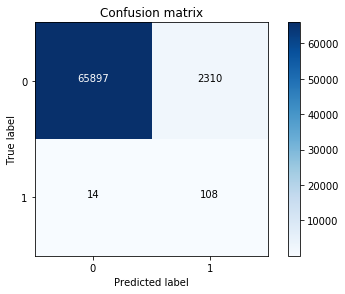

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_undersample, y_undersample)
pred = lr_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))

122
None
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     68207
          1       0.08      0.84      0.14       122

avg / total       1.00      0.98      0.99     68329



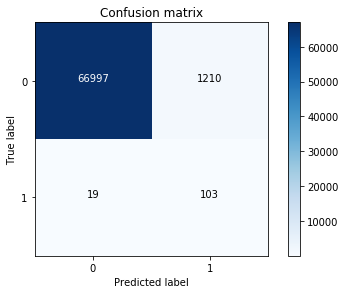

In [93]:
# using grid search recommended parameters

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lr_model = LogisticRegression(C=0.1, penalty='l1')
lr_model.fit(X_undersample, y_undersample)
pred = lr_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))

122
None
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     68207
          1       0.06      0.86      0.10       122

avg / total       1.00      0.97      0.99     68329



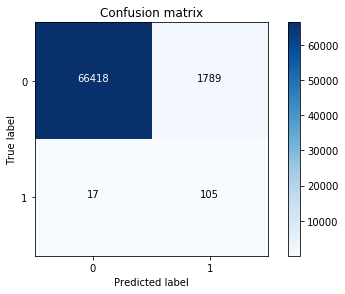

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf_model = RandomForestClassifier()
rf_model.fit(X_undersample, y_undersample)
pred = rf_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))

In [95]:
# grid searching logistic regression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_undersample,y_undersample)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.9394463667820069


In [98]:
# grid searching random forest
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,param_grid,cv=10)
rf_cv.fit(X_undersample,y_undersample)

print("tuned hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.9446366782006921


122
None
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     68207
          1       0.19      0.84      0.32       122

avg / total       1.00      0.99      1.00     68329



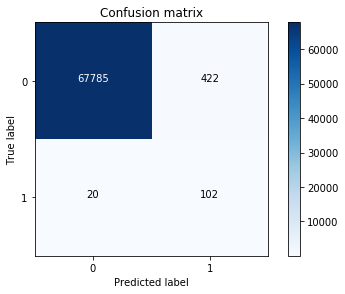

In [103]:
# Random Forest with the best combination of criterias using Grid Search

rf_model = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'auto', n_estimators = 500)
rf_model.fit(X_undersample, y_undersample)
pred = rf_model.predict(X_test)

class_names = [0,1]
print(np.sum(y_test))
print(plot_confusion_matrix(confusion_matrix(y_test, pred), classes=class_names, title='Confusion matrix'))
print(classification_report(y_test, pred))